In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [6]:
#train_data[10]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_news = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]
)

557056/550378 [==============================] - 1s 1us/step


In [9]:
decode_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[10]

3

### Prepare data

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for (i, sequence) in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for (i, label) in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

#### validating approach

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                  )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 108us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

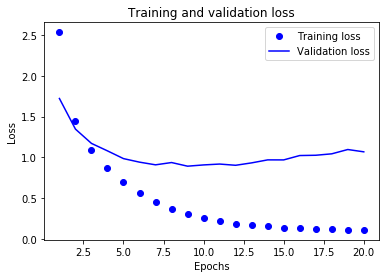

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
#plt.cls()

#acc = history['acc']

Text(0,0.5,'Accuracy')

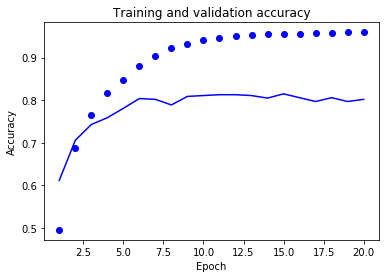

In [28]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

#### retraining a model from scratch

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=521,
          validation_data=(x_val, y_val)
         )

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 110us/step - loss: 2.5559 - acc: 0.5187 - val_loss: 1.6857 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.3807 - acc: 0.7101 - val_loss: 1.2843 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 1s 79us/step - loss: 1.0261 - acc: 0.7765 - val_loss: 1.1253 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.8087 - acc: 0.8227 - val_loss: 1.0629 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.6504 - acc: 0.8587 - val_loss: 0.9986 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.5249 - acc: 0.8910 - val_loss: 0.9272 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 77us/step - loss: 0.4219 - acc: 0.9126 - val_loss: 0.9033 - val_acc: 0.8250
Epoch 8/9
798

In [30]:
results

[1.0103032081549654, 0.7818343722703515]

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)


0.19278717720391808

#### generating prediction on new data

In [34]:
predictions = model.predict(x_test)

In [37]:
predictions[0]

array([1.21070652e-05, 5.59614709e-05, 2.24801188e-05, 9.54088986e-01,
       3.56177501e-02, 1.11398371e-07, 6.37932098e-05, 4.53734683e-05,
       3.19247111e-03, 2.58844398e-06, 3.42768144e-05, 8.25821131e-04,
       3.07225491e-05, 2.43773047e-05, 3.05963954e-06, 1.16742158e-05,
       1.06699788e-03, 1.17682524e-04, 2.83441157e-04, 8.91445903e-04,
       1.12036464e-03, 2.85325252e-04, 4.35832681e-06, 6.93712063e-05,
       1.04102910e-05, 2.33533996e-04, 2.45840283e-06, 2.20629172e-05,
       6.37732865e-06, 1.23380465e-04, 3.06675298e-04, 2.26845717e-04,
       1.27786852e-05, 4.04047896e-05, 4.09989407e-05, 1.39374588e-05,
       7.43434284e-05, 5.69944532e-05, 9.57768279e-05, 2.45328760e-04,
       2.04945554e-05, 5.48692129e-04, 1.23855204e-06, 2.97931656e-05,
       5.52013398e-06, 1.13363485e-05], dtype=float32)

In [38]:
np.sum(predictions[0])

1.0

#### the class with the highest probability

In [39]:
np.argmax(predictions[0])

3